In [18]:
import Macaco as mc
import pandas as pd
import seaborn as sns
import numpy as np
from tabulate import tabulate
from matplotlib import pyplot as plt


iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Test 1

In [2]:
data = {'col_1': [3, 2, 1, 0], 'col_2': ['a', 'b', 'c', 'd']}
df = mc.DataFrameMc(data)
df.InserirColuna(['davi','b','z','z'],'col_3')
df.InserirColuna([2.3,3.14,1,2.0],'col_2')
df.GetColuna('col_1')
df.GetColuna('col_2')

[2.3, 3.14, 1.0, 2.0]

# Test 2 - Large Dataset

In [3]:
data = iris.to_dict('list')
df = mc.DataFrameMc(data)
df.Show(df.GetDados())

  sepal_length    sepal_width    petal_length    petal_width  species
--------------  -------------  --------------  -------------  ----------
           5.1            3.5             1.4            0.2  setosa
           4.9            3               1.4            0.2  setosa
           4.7            3.2             1.3            0.2  setosa
           4.6            3.1             1.5            0.2  setosa
           5              3.6             1.4            0.2  setosa
           5.4            3.9             1.7            0.4  setosa
           4.6            3.4             1.4            0.3  setosa
           5              3.4             1.5            0.2  setosa
           4.4            2.9             1.4            0.2  setosa
           4.9            3.1             1.5            0.1  setosa
           5.4            3.7             1.5            0.2  setosa
           4.8            3.4             1.6            0.2  setosa
           4.8            3  

In [4]:
# Testando queries sem indexação

species = pd.unique(iris['species'])
for i in species:
    assert df.GetLinha(df.Query('species','==',i)) == iris[iris['species']==i].to_dict('list')

colunas = iris.columns[0:-1]
for col in colunas:
    for i in np.linspace(iris[col].min(),iris[col].max()):
        assert df.GetLinha(df.Query(col,'<',i)) == iris[iris[col]<i].to_dict('list')
        assert df.GetLinha(df.Query(col,'<=',i)) == iris[iris[col]<=i].to_dict('list')
        assert df.GetLinha(df.Query(col,'>',i)) == iris[iris[col]>i].to_dict('list')
        assert df.GetLinha(df.Query(col,'>=',i)) == iris[iris[col]>=i].to_dict('list')
        assert df.GetLinha(df.Query(col,'==',i)) == iris[iris[col]==i].to_dict('list')
        
# Testando queries com indexação        
df.IndexarColuna('species')
df.IndexarColuna('sepal_length')
df.IndexarColuna('sepal_width')
df.IndexarColuna('petal_length')
df.IndexarColuna('petal_width')

for i in species:
    assert df.GetLinha(df.Query('species','==',i)) == iris[iris['species']==i].to_dict('list')
    
colunas = iris.columns[0:-1]
for col in colunas:
    for i in np.linspace(iris[col].min(),iris[col].max()):
        assert df.GetLinha(df.Query(col,'<',i)) == iris[iris[col]<i].to_dict('list')
        assert df.GetLinha(df.Query(col,'<=',i)) == iris[iris[col]<=i].to_dict('list')
        assert df.GetLinha(df.Query(col,'>',i)) == iris[iris[col]>i].to_dict('list')
        assert df.GetLinha(df.Query(col,'>=',i)) == iris[iris[col]>=i].to_dict('list')
        assert df.GetLinha(df.Query(col,'==',i)) == iris[iris[col]==i].to_dict('list')
df.RemoverIndice('species')
df.RemoverIndice('sepal_length')
df.RemoverIndice('sepal_width')
df.RemoverIndice('petal_length')
df.RemoverIndice('petal_width')

In [5]:
for col in colunas:
    assert sum(df.GetColuna(col) == iris[col])


In [6]:
df.GetLoc(list(range(10,50)),'sepal_length')

[5.4,
 4.8,
 4.8,
 4.3,
 5.8,
 5.7,
 5.4,
 5.1,
 5.7,
 5.1,
 5.4,
 5.1,
 4.6,
 5.1,
 4.8,
 5.0,
 5.0,
 5.2,
 5.2,
 4.7,
 4.8,
 5.4,
 5.2,
 5.5,
 4.9,
 5.0,
 5.5,
 4.9,
 4.4,
 5.1,
 5.0,
 4.5,
 4.4,
 5.0,
 5.1,
 4.8,
 5.1,
 4.6,
 5.3,
 5.0]

In [7]:
df.RemoverColuna('species')
df.Show(df.GetDados())

  sepal_length    sepal_width    petal_length    petal_width
--------------  -------------  --------------  -------------
           5.1            3.5             1.4            0.2
           4.9            3               1.4            0.2
           4.7            3.2             1.3            0.2
           4.6            3.1             1.5            0.2
           5              3.6             1.4            0.2
           5.4            3.9             1.7            0.4
           4.6            3.4             1.4            0.3
           5              3.4             1.5            0.2
           4.4            2.9             1.4            0.2
           4.9            3.1             1.5            0.1
           5.4            3.7             1.5            0.2
           4.8            3.4             1.6            0.2
           4.8            3               1.4            0.1
           4.3            3               1.1            0.1
           5.8          

In [8]:
for col in colunas:
    for i in np.linspace(iris[col].min(),iris[col].max()):
        assert df.GetLinha(df.Query(col,'<',i)) == iris[iris[col]<i].drop('species',axis=1).to_dict('list')
        assert df.GetLinha(df.Query(col,'<=',i)) == iris[iris[col]<=i].drop('species',axis=1).to_dict('list')
        assert df.GetLinha(df.Query(col,'>',i)) == iris[iris[col]>i].drop('species',axis=1).to_dict('list')
        assert df.GetLinha(df.Query(col,'>=',i)) == iris[iris[col]>=i].drop('species',axis=1).to_dict('list')
        assert df.GetLinha(df.Query(col,'==',i)) == iris[iris[col]==i].drop('species',axis=1).to_dict('list')
        
# Testando queries com indexação        
df.IndexarColuna('sepal_length')
df.IndexarColuna('sepal_width')
df.IndexarColuna('petal_length')
df.IndexarColuna('petal_width')

for col in colunas:
    for i in np.linspace(iris[col].min(),iris[col].max()):
        assert df.GetLinha(df.Query(col,'<',i)) == iris[iris[col]<i].drop('species',axis=1).to_dict('list')
        assert df.GetLinha(df.Query(col,'<=',i)) == iris[iris[col]<=i].drop('species',axis=1).to_dict('list')
        assert df.GetLinha(df.Query(col,'>',i)) == iris[iris[col]>i].drop('species',axis=1).to_dict('list')
        assert df.GetLinha(df.Query(col,'>=',i)) == iris[iris[col]>=i].drop('species',axis=1).to_dict('list')
        assert df.GetLinha(df.Query(col,'==',i)) == iris[iris[col]==i].drop('species',axis=1).to_dict('list')





In [9]:
df.InserirColuna(list(iris['species'].values),'species')
df.Show(df.GetDados())

  sepal_length    sepal_width    petal_length    petal_width  species
--------------  -------------  --------------  -------------  ----------
           5.1            3.5             1.4            0.2  setosa
           4.9            3               1.4            0.2  setosa
           4.7            3.2             1.3            0.2  setosa
           4.6            3.1             1.5            0.2  setosa
           5              3.6             1.4            0.2  setosa
           5.4            3.9             1.7            0.4  setosa
           4.6            3.4             1.4            0.3  setosa
           5              3.4             1.5            0.2  setosa
           4.4            2.9             1.4            0.2  setosa
           4.9            3.1             1.5            0.1  setosa
           5.4            3.7             1.5            0.2  setosa
           4.8            3.4             1.6            0.2  setosa
           4.8            3  

In [10]:
df.RemoverLinha([0,1,2,3,5])
df.Show(df.GetDados())

  sepal_length    sepal_width    petal_length    petal_width  species
--------------  -------------  --------------  -------------  ----------
           5              3.6             1.4            0.2  setosa
           4.6            3.4             1.4            0.3  setosa
           5              3.4             1.5            0.2  setosa
           4.4            2.9             1.4            0.2  setosa
           4.9            3.1             1.5            0.1  setosa
           5.4            3.7             1.5            0.2  setosa
           4.8            3.4             1.6            0.2  setosa
           4.8            3               1.4            0.1  setosa
           4.3            3               1.1            0.1  setosa
           5.8            4               1.2            0.2  setosa
           5.7            4.4             1.5            0.4  setosa
           5.4            3.9             1.3            0.4  setosa
           5.1            3.5

In [11]:
print(df.shape,iris.shape)
print(df.colunas)
print(df.indices)

[145, 5] (150, 5)
{'sepal_length': 'double', 'sepal_width': 'double', 'petal_length': 'double', 'petal_width': 'double', 'species': 'string'}
['petal_length', 'petal_width', 'sepal_length', 'sepal_width']


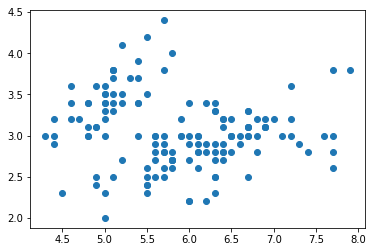

In [12]:
df.Plot('sepal_length','sepal_width')

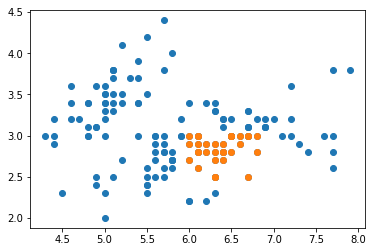

In [22]:
rect1 = [6.0,2.5,7,3]
rect2 = [4,3.5,6,5]
filtro1 = df.GetLinha(df.QueryRect(rect1, 'sepal_length', 'sepal_width'))
filtro2 = df.GetLinha(df.QueryRect(rect2, 'sepal_length', 'sepal_width'))

df.Plot('sepal_length','sepal_width')
plt.plot(filtro1['sepal_length'],filtro['sepal_width'],'o')
plt.plot(filtro['sepal_length'],filtro['sepal_width'],'o')